## importing liberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [2]:
df = pd.read_csv("database SFRC.csv")

### EDA-Exploratory data Analysis

In [4]:
#independent and target variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [5]:
y.head(10)

0    112.9500
1     79.0650
2    109.1850
3    123.4920
4    111.0675
5    131.0220
6     64.7580
7     77.1825
8     91.1130
9    101.6550
Name: Vu (KN), dtype: float64

In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [9]:
# Train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 64)

### Model Development

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

#### Model Evaluation

In [10]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,knn.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,knn.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,knn.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,knn.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,knn.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,knn.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,knn.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,knn.predict(X_train)))

The RMSE  on the testing dataset is:  64.20297278045327
The RMSE  on the training dataset is:  66.32502781676988
The MSE  on the testing dataset is:  4122.021713847623
The MSE  on the training dataset is:  4399.009314895297
The MAE  on the testing dataset is:  36.36353525609523
The MAE  on the training daset is:  31.62481468164223
The r2_score on the testing dataset is:  0.7915790376286205
The r2_score on the training dataset is:  0.8132546611113661


### Hyperparameter Tunning (Optimization)

In [11]:
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsRegressor


In [12]:
KNN =  KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='neg_mean_squared_error')

In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [16]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')


In [17]:
KNN_O = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 3, weights = 'distance')
KNN_O.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [20]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,grid_search.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,grid_search.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,grid_search.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,grid_search.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,grid_search.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,grid_search.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,grid_search.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,grid_search.predict(X_train)))

The RMSE  on the testing dataset is:  43.962959137565036
The RMSE  on the training dataset is:  5.963248461796409
The MSE  on the testing dataset is:  1932.741776131213
The MSE  on the training dataset is:  35.56033221711724
The MAE  on the testing dataset is:  26.94886092629667
The MAE  on the training daset is:  1.2955415190390625
The r2_score on the testing dataset is:  0.9022751627815593
The r2_score on the training dataset is:  0.9984904041306774


### Actual vs predicted Capacity

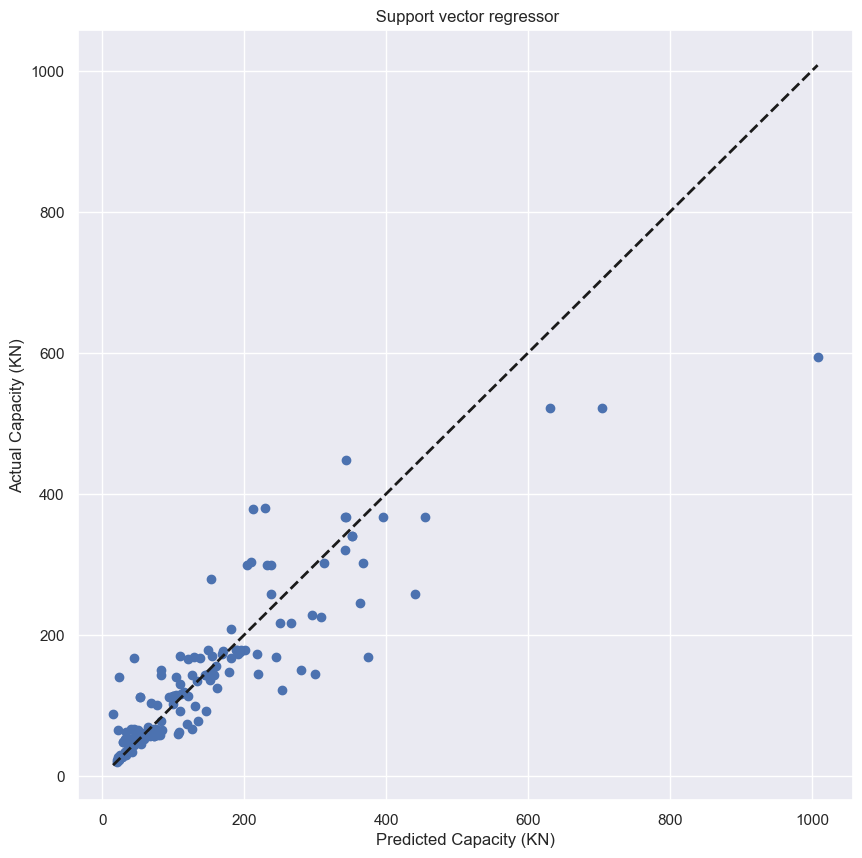

In [21]:
plt.figure(figsize=(10,10))
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title(" Support vector regressor")
plt.scatter(y_test,KNN.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()